In [39]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn.functional as F
import torch.optim as optim
import os
import time
from datetime import timedelta

In [40]:
traindir = r'F:\DeepLearning\datasets\dogvscat\training_set'
testdir = r'F:\DeepLearning\datasets\dogvscat\test_set'
batch_size = 32
num_worker = 2

In [46]:
def load_data(traindir, testdir, batch_size = batch_size, num_worker = num_worker, shuffle = True):
    print('starting load data...')
    train_loder = torch.utils.data.DataLoader(
    datasets.ImageFolder(traindir, transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ])),
    batch_size= batch_size,
    shuffle = shuffle,
    num_workers = num_worker)
    
    test_loder = torch.utils.data.DataLoader(
    datasets.ImageFolder(testdir, transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ])),
    batch_size= batch_size,
    shuffle = shuffle,
    num_workers = num_worker)
    
    print('ending load data...')
    
    return train_loder, test_loder

In [54]:
def train(data_loder, model, lossFunc, optimizer, num_epoch = 1):
    print('Start training...')
    for epoch in range(num_epoch):
        print('Starting epoch %d / %d' %(epoch+1, num_epoch))
        #模型训练
        for i,(images, labels) in enumerate(data_loder):
            predict = model(images)
            optimizer.zero_grad()
            loss = lossFunc(predict, labels)
            loss.backward()
            optimizer.step()
            print('epoch %d, iteration %d, loss %s' % (epoch, i, loss.item()))
    print('End training...')
    

In [48]:
class Mymodel(nn.Module):
    def __init__(self):
        super(Mymodel, self).__init__()
        self.vgg = models.vgg16()
        self.last_layer = torch.nn.Linear(in_features=1000, out_features=2)
    def forward(self, x):
        x = self.vgg(x)
        x = F.relu(x)
        x = self.last_layer(x)
        
        return x
        

In [49]:
def build_model(path):
    #加载vgg预训练参数
    vgg_state_dict = torch.load(path)
    model = Mymodel()
    model.vgg.load_state_dict(vgg_state_dict)
    
    #冻结部分参数
    for name, p in model.vgg.named_parameters():
        p.requires_grad = False
        
    return model

In [51]:
#定义模型， 损失， 优化规则
model = build_model(path = r'F:\DeepLearning\models\vgg16-397923af.pth')
lossFunc = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#加载数据
train_loder, test_loder = load_data(traindir, testdir)

starting load data...
ending load data...


In [64]:
print(model)

Mymodel(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): Ma

In [55]:
#开始训练
train(train_loder, model, lossFunc, optimizer, num_epoch=2 )

Start training...
Starting epoch 1 / 2
epoch 0, iteration 0, loss 0.20020660758018494
epoch 0, iteration 1, loss 0.18908384442329407
epoch 0, iteration 2, loss 0.288632869720459
epoch 0, iteration 3, loss 0.4444577097892761
epoch 0, iteration 4, loss 0.566159188747406
epoch 0, iteration 5, loss 0.1385945975780487
epoch 0, iteration 6, loss 0.22637026011943817
epoch 0, iteration 7, loss 0.16172713041305542
epoch 0, iteration 8, loss 0.058018844574689865
epoch 0, iteration 9, loss 0.19436973333358765
epoch 0, iteration 10, loss 0.5121546387672424
epoch 0, iteration 11, loss 0.2016671746969223
epoch 0, iteration 12, loss 0.0931384265422821
epoch 0, iteration 13, loss 0.14426074922084808
epoch 0, iteration 14, loss 0.16857777535915375
epoch 0, iteration 15, loss 0.2201053649187088
epoch 0, iteration 16, loss 0.22326265275478363
epoch 0, iteration 17, loss 0.18279436230659485
epoch 0, iteration 18, loss 0.3035489320755005
epoch 0, iteration 19, loss 0.18346042931079865
epoch 0, iteration 20

epoch 0, iteration 170, loss 0.1540597677230835
epoch 0, iteration 171, loss 0.15555709600448608
epoch 0, iteration 172, loss 0.13636323809623718
epoch 0, iteration 173, loss 0.1639677882194519
epoch 0, iteration 174, loss 0.06107407063245773
epoch 0, iteration 175, loss 0.07609765231609344
epoch 0, iteration 176, loss 0.05456648766994476
epoch 0, iteration 177, loss 0.19970114529132843
epoch 0, iteration 178, loss 0.15845876932144165
epoch 0, iteration 179, loss 0.07566098123788834
epoch 0, iteration 180, loss 0.040378015488386154
epoch 0, iteration 181, loss 0.15755774080753326
epoch 0, iteration 182, loss 0.08287014812231064
epoch 0, iteration 183, loss 0.06992136687040329
epoch 0, iteration 184, loss 0.09668518602848053
epoch 0, iteration 185, loss 0.1577891856431961
epoch 0, iteration 186, loss 0.2147083431482315
epoch 0, iteration 187, loss 0.20645958185195923
epoch 0, iteration 188, loss 0.04456811025738716
epoch 0, iteration 189, loss 0.07907932996749878
epoch 0, iteration 190,

epoch 1, iteration 89, loss 0.23561927676200867
epoch 1, iteration 90, loss 0.20747624337673187
epoch 1, iteration 91, loss 0.13163936138153076
epoch 1, iteration 92, loss 0.15337127447128296
epoch 1, iteration 93, loss 0.15367643535137177
epoch 1, iteration 94, loss 0.0921851173043251
epoch 1, iteration 95, loss 0.00839861761778593
epoch 1, iteration 96, loss 0.1599949598312378
epoch 1, iteration 97, loss 0.1490316092967987
epoch 1, iteration 98, loss 0.24003799259662628
epoch 1, iteration 99, loss 0.09590364992618561
epoch 1, iteration 100, loss 0.26276659965515137
epoch 1, iteration 101, loss 0.03018924407660961
epoch 1, iteration 102, loss 0.07345744222402573
epoch 1, iteration 103, loss 0.09624817222356796
epoch 1, iteration 104, loss 0.0284604262560606
epoch 1, iteration 105, loss 0.05645501986145973
epoch 1, iteration 106, loss 0.045852720737457275
epoch 1, iteration 107, loss 0.022702667862176895
epoch 1, iteration 108, loss 0.006403027568012476
epoch 1, iteration 109, loss 0.2

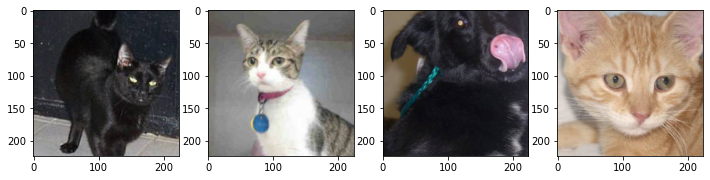

In [15]:
import matplotlib.pyplot as plt
batch_images = batch_images.permute(0,2,3,1)
f = plt.figure(figsize=(12,6))
for i in range(4):
    f.add_subplot(1,4, i+1)
    plt.imshow(batch_images[i])


In [62]:
#在测试集上测试准确性
#在测试集上测试性能
total = 0
correct = 0

iter_data = iter(test_loder)

with torch.no_grad():
    for i in range(20):
        data = iter_data.next()
        images, labels = data
        out = model(images)
        _, predict = torch.max(out, 1)
        total += labels.size(0)
        correct += (labels == predict).sum().item()
        
print('Accuracy: %s' % (100*correct / total))

Accuracy: 94.21875


In [56]:
#模型保存参数
save_dir = r'F:\DeepLearning\models'
torch.save(model.state_dict(), os.path.join(save_dir, 'mymodel.pkl'))